## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 1       9       1       0       5       

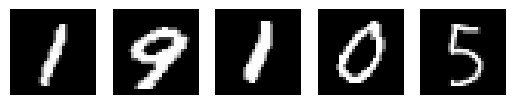

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], -1)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    layers.Dense(64, activation='relu'),                       # Second hidden layer
    layers.Dense(10, activation='softmax')                     # Output layer (10 classes)
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 10              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(
    x_train_flatten, y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation)
    )

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5581 - loss: 28.7431 - val_accuracy: 0.8391 - val_loss: 1.6911
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8486 - loss: 1.3072 - val_accuracy: 0.8540 - val_loss: 0.8963
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8654 - loss: 0.7178 - val_accuracy: 0.8770 - val_loss: 0.6647
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8910 - loss: 0.4853 - val_accuracy: 0.8914 - val_loss: 0.5499
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9092 - loss: 0.3785 - val_accuracy: 0.9030 - val_loss: 0.5002
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9241 - loss: 0.3084 - val_accuracy: 0.9097 - val_loss: 0.4547
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9321 - loss: 0.2462 - val_accuracy: 0.9169 - val_loss: 0.4169
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9427 - loss: 0.2106 - val_accuracy: 0.9215 - 

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.4348
Loss =  0.37693509459495544
Accuracy =  92.65000224113464 %


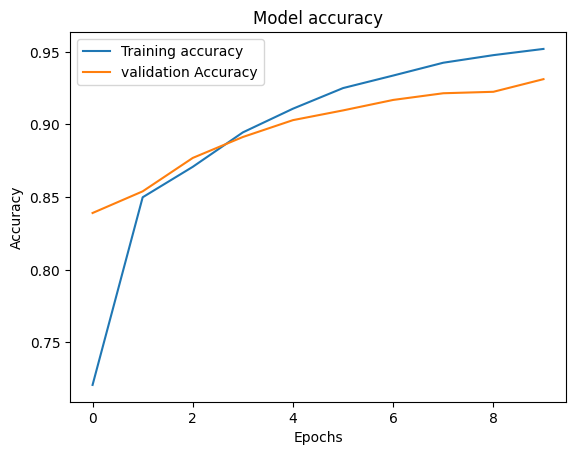

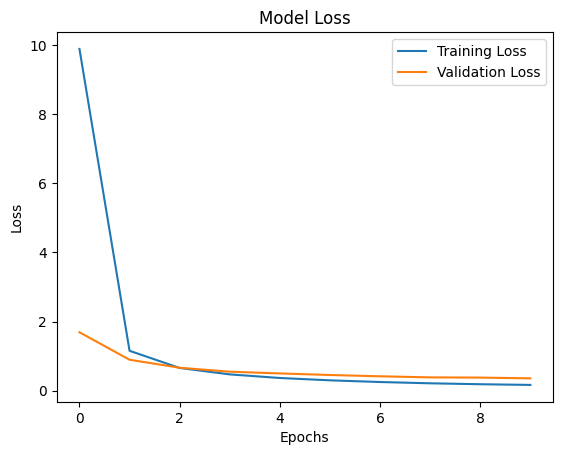

In [ ]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label:  9 5 9 3 0 3 6 9 3 3 

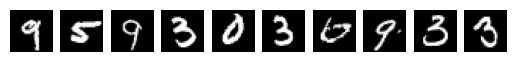

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
9 

In [ ]:
n = 10   # = no. of images to see predictions on

index = np.random.choice(len(x_test), n, replace=False)  # choose random index from test data
print("label: ", end=" ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind], cmap='gray')             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end=" ")

plt.show()
print("Predicted value: ", end = " ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...
    img = x_test[ind].reshape(1, 784)
    pred = model.predict(img)

    digit = np.argmax(pred)
    print(digit,end=" ")